## Wave in Vaccum

In [2]:
# Add zpic library to path
import sys

sys.path.append("../lib")

# get ZPIC 2D
import em1d as zpic
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import clear_output, Video

matplotlib.rcParams["figure.figsize"] = (10, 8)

In [2]:
# Time step
dt = 0.01

# Number of cells
nx = 64

# Simulation box size
box = 6.4
def E(ix, dx):
    x = (ix+0.5)*dx
    return [0,0,np.sin(x)**2]
sim = zpic.Simulation(nx, box, dt)
init = zpic.InitialField(E_type = 'custom', E_custom = E)
sim.emf.init_fld( init )

In [3]:
# sim.set_moving_window()
iterations = int(10/dt)
Ezs = np.zeros((iterations, nx))
Bys = np.zeros((iterations, nx))
for i in range(iterations):
    print(f"{i+1} of {iterations}", end="\r")
    sim.iter()
    Ezs[i] = sim.emf.Ez
    Bys[i] = sim.emf.By


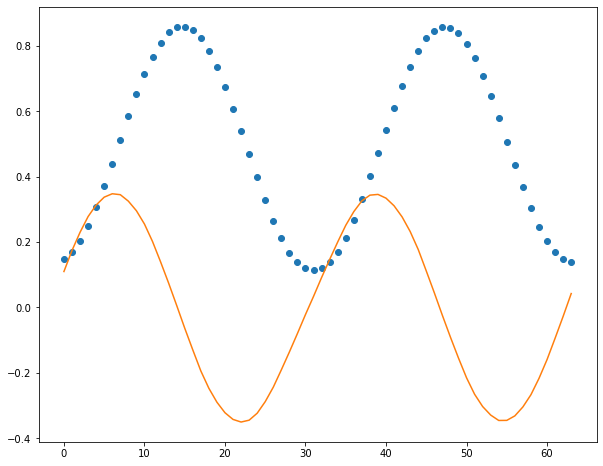

In [4]:
plt.plot(sim.emf.Ez, "o")
plt.plot(sim.emf.By)

In [18]:
# Creating the Figure and Axes
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()

# Setting title and axes names
plt.title("Wave in Vaccum", fontdict={"fontsize": 18})
plt.xlabel("Node", fontdict={"fontsize": 18})
plt.ylabel("Amplitude", fontdict={"fontsize": 18})
plt.xlim(0, 64)
plt.ylim(-1.1, 1.1)

# Lines which are neede to animate
N = 2
lines = [plt.plot([], [])[0] for _ in range(N)]

# The init function
def init():
    # init lines
    for line in lines:
        line.set_data([], [])
    return lines


# Needed for adding legends
legend = plt.legend()

# The Animate function
def animate(i):
    values = np.array([Ezs[i], Bys[i]])

    # Plot the solution and the legends
    for j, line in enumerate(lines):
        line.set_data(range(len(values[j])), values[j])
        if j == 0:
            line.set_label(fr"$E_z$ at t={(i+1)*dt:.2f}")
        else:
            line.set_label(fr"$H_x$ at t={(i+1)*dt:.2f}")
    legend = plt.legend(loc="upper right")
    if (i + 1) % 50 == 0:
        print("Time", i + 1, end="\r")
        # clear_output(wait=True)
    return lines + [legend]


# The animation
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=np.arange(0, iterations), interval=40, blit=True
)

# Saving the Animation
anim.save("wave.mp4", writer="ffmpeg")
plt.close()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [19]:
Video("wave.mp4")

## Laser

In [5]:
# Add zpic library to path
import sys
sys.path.append("../lib")

import em1d
import numpy as np

# Time step
dt = 0.019

# Number of cells
nx  = 1000

# Simulation box size
box = 20.0

# Initialize simulation
sim = em1d.Simulation( nx, box, dt )

# Add laser pulse
sim.add_laser( em1d.Laser( start = 15.0, fwhm = 4.0, a0 = 1.0, omega0 = 10.0,
               polarization = np.pi/2 ))

In [6]:
# Set moving window
# sim.set_moving_window()

iterations = int(50/dt)
Ezs = np.zeros((iterations, nx))
Bys = np.zeros((iterations, nx))
for i in range(iterations):
    print(f"{i+1} of {iterations}", end="\r")
    sim.iter()
    Ezs[i] = sim.emf.Ez
    Bys[i] = sim.emf.By


In [7]:
Ezs.max(), Bys.max()

(11.774473190307617, 11.905373573303223)

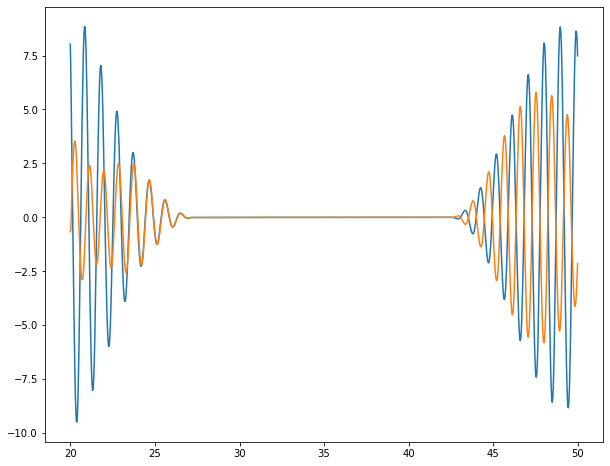

In [8]:
xmin = sim.dx/2 + sim.t
xmax = sim.box + (sim.n_move - 0.5) * sim.dx
plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ez, label = "$E_z$ field" )
plt.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.By, label = "$B_y$ field" )

In [10]:
# Creating the Figure and Axes
fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
xmin = sim.dx/2 + sim.t
xmax = sim.box + (sim.n_move - 0.5) * sim.dx
# Setting title and axes names
plt.title("Laser in Vaccum", fontdict={"fontsize": 18})
plt.xlabel("Node", fontdict={"fontsize": 18})
plt.ylabel("Amplitude", fontdict={"fontsize": 18})
plt.xlim(xmin, xmax)
plt.ylim(-10.1, 10.1)

# Lines which are neede to animate
N = 2
lines = [plt.plot([], [])[0] for _ in range(N)]

# The init function
def init():
    # init lines
    for line in lines:
        line.set_data([], [])
    return lines


# Needed for adding legends
legend = plt.legend()

# The Animate function
def animate(i):
    values = np.array([Ezs[i], Bys[i]])

    # Plot the solution and the legends
    for j, line in enumerate(lines):
        line.set_data(np.linspace(xmin, xmax, num = sim.nx), values[j])
        if j == 0:
            line.set_label(fr"$E_z$ at t={(i+1)*dt:.2f}")
        else:
            line.set_label(fr"$H_x$ at t={(i+1)*dt:.2f}")
    legend = plt.legend(loc="upper right")
    if (i + 1) % 50 == 0:
        print("Time", i + 1, end="\r")
        # clear_output(wait=True)
    return lines + [legend]


# The animation
anim = animation.FuncAnimation(
    fig, animate, init_func=init, frames=np.arange(0, iterations), interval=10, blit=True
)

# Saving the Animation
anim.save("Laser.mp4", writer="ffmpeg")
plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter ffmpeg unavailable; using Pillow instead.


In [38]:
Video("Laser.mp4")

## Plasma Wave

In [43]:
import matplotlib
import sys
import numpy as np
sys.path.append("../lib")
import em1d as zpic
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (12, 8)


In [44]:
v_the = 0.03
electrons = zpic.Species( "electrons", -1.0, ppc = 64, uth=[v_the,v_the,v_the])
sim = zpic.Simulation( nx = 500, box = 50.0, dt = 0.0999/2, species = electrons )

In [45]:
niter = 4000

Ex_t = np.zeros((niter,sim.nx))
Ez_t = np.zeros((niter,sim.nx))

tmax = niter * sim.dt

print(f"Running simulation up to t = {tmax:g} ...")
while sim.t <= tmax:
    print(f'n = {sim.n}, t = {sim.t:.2f}', end = '\r')
    Ex_t[sim.n,:] = sim.emf.Ex
    Ez_t[sim.n,:] = sim.emf.Ez
    sim.iter()

print("\nDone.")

Running simulation up to t = 199.8 ...
n = 3999, t = 199.75
Done.


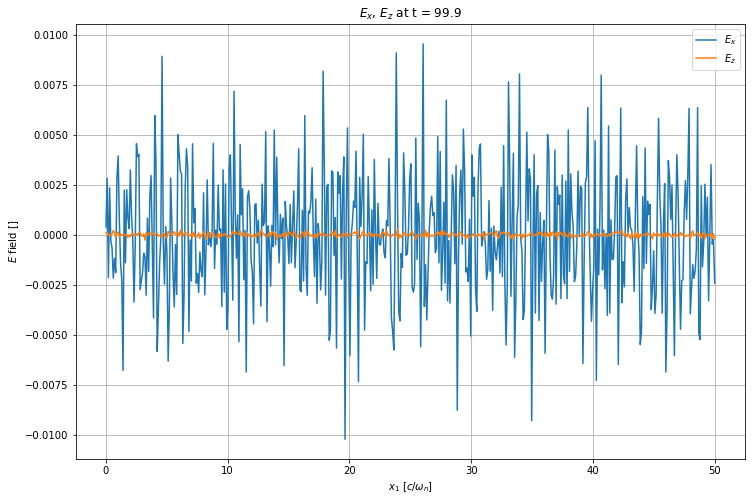

In [47]:
iter = sim.n//2
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ex_t[iter,:], label = "$E_x$")
plt.plot(np.linspace(0, sim.box, num = sim.nx),Ez_t[iter,:], label = "$E_z$")
plt.grid(True)

plt.xlabel("$x_1$ [$c/\omega_n$]")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ at t = {(iter * sim.dt):g}")
plt.legend()
plt.show()

In [60]:
Ex_at_99 = Ex_t[iter,:]

In [62]:
Ex_at_99 = np.fft.fft2(Ex_t)
Ex_at_99 = np.absolute(Ex_at_99)

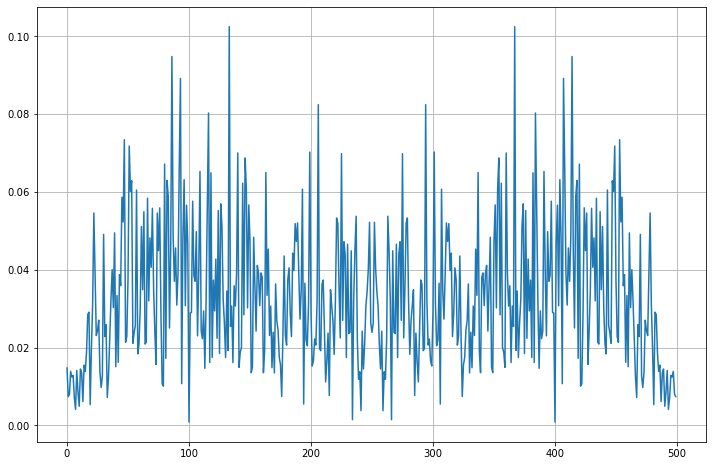

In [63]:
iter = sim.n//2
plt.plot(Ex_at_99[iter,:], label = "$E_x$")
# plt.plot(np.linspace(0, sim.box, num = sim.nx),Ez_t[iter,:], label = "$E_z$")
plt.grid(True)

In [64]:
Ex_at_99 = np.fft.fftshift(Ex_at_99)

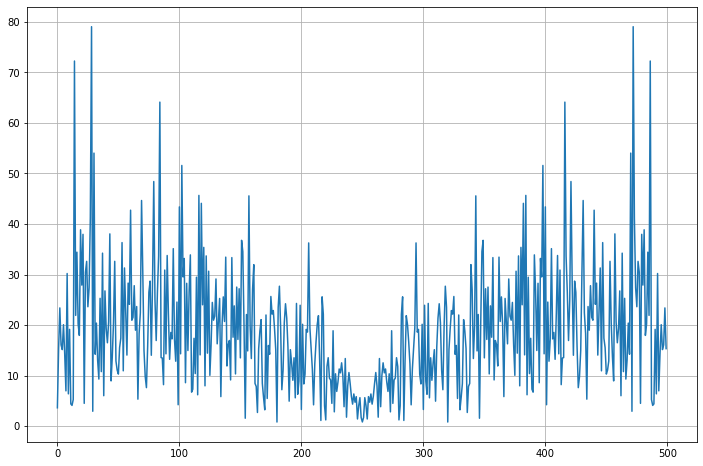

In [65]:
iter = sim.n//2
plt.plot(Ex_at_99[iter,:], label = "$E_x$")
# plt.plot(np.linspace(0, sim.box, num = sim.nx),Ez_t[iter,:], label = "$E_z$")
plt.grid(True)

In [72]:
sp = np.fft.fft2(Ex_t)
sp = np.absolute(sp)

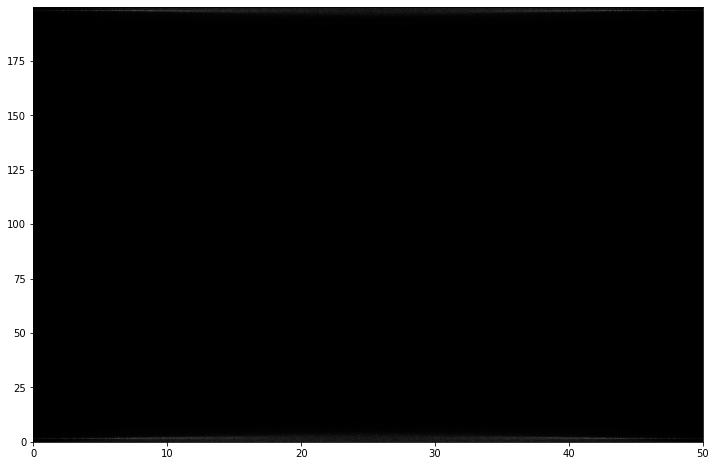

In [73]:
plt.figure(figsize=(12, 8))
plt.imshow(sp, cmap='gray', origin='lower', extent=[0, sim.box, 0, tmax], aspect='auto')


In [70]:
sp = np.fft.fftshift( sp )

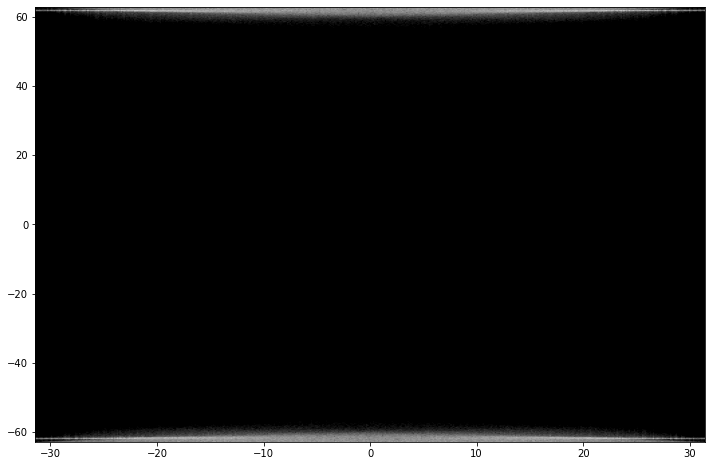

In [74]:
import matplotlib.colors as colors
plt.figure(figsize=(12, 8))
k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt
plt.imshow(sp, cmap='gray', origin='lower', extent = ( -k_max, k_max, -omega_max, omega_max ), aspect='auto',
    norm=colors.LogNorm(vmin = 1.0)
    )
# plt.ylim(-2,2)
# plt.xlim(-k_max,k_max)

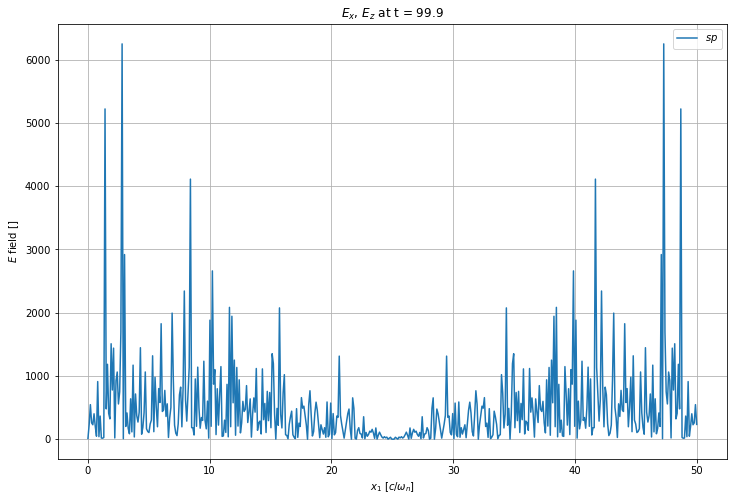

In [11]:
iter = sim.n//2
plt.plot(np.linspace(0, sim.box, num = sim.nx),sp[iter,:], label = "$sp$")
# plt.plot(np.linspace(0, sim.box, num = sim.nx),Ex_t[iter,:], label = "$E_x$")
plt.grid(True)

plt.xlabel("$x_1$ [$c/\omega_n$]")
plt.ylabel("$E$ field []")
plt.title(f"$E_x$, $E_z$ at t = {(iter * sim.dt):g}")
plt.legend()
plt.show()

31.415926067764154
62.894747947202916


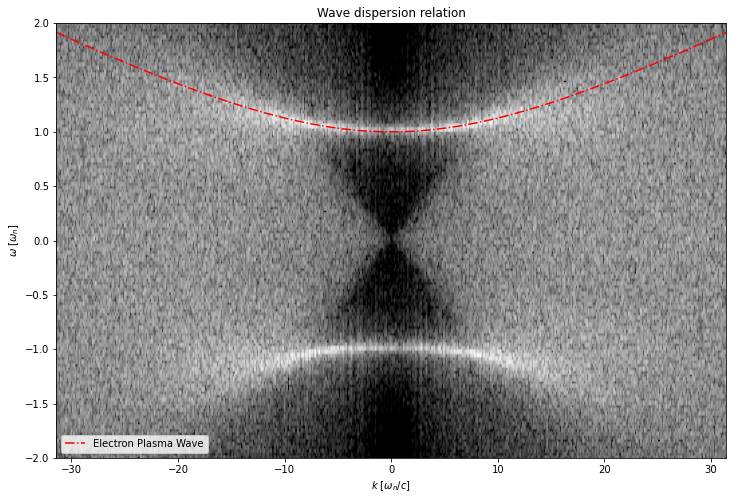

In [12]:
import matplotlib.colors as colors
k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt
print(k_max)
print(omega_max)
plt.imshow( sp, origin = 'lower', norm=colors.LogNorm(vmin = 1.0),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto', cmap = 'gray')
k = np.linspace(-k_max, k_max, num = 512)
w=np.sqrt(1 + 3 * v_the**2 * k**2)
plt.plot( k, w, label = "Electron Plasma Wave", color = 'r',ls = '-.' )
plt.ylim(-2,2)
plt.xlim(-k_max,k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("Wave dispersion relation")

plt.legend()

plt.show()


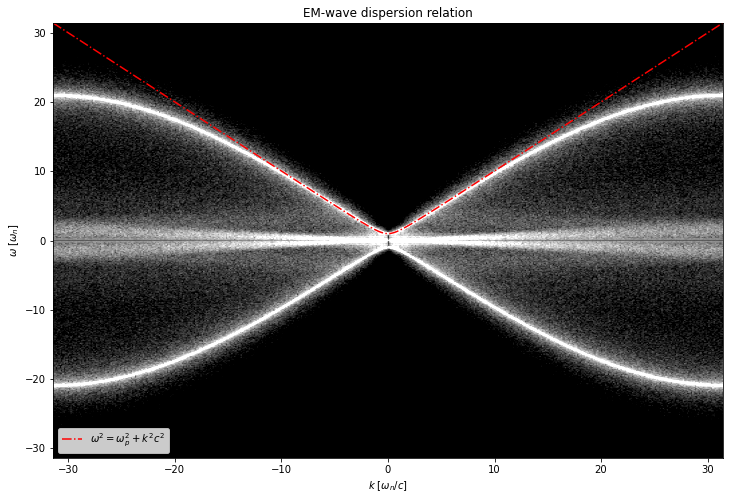

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# (omega,k) power spectrum

win = np.hanning(niter)
for i in range(sim.nx):
    Ez_t[:,i] *= win

sp = np.abs(np.fft.fft2(Ez_t))**2
sp = np.fft.fftshift( sp )

k_max = np.pi / sim.dx
omega_max = np.pi / sim.dt

plt.imshow( sp, origin = 'lower', norm=colors.LogNorm(vmin = 1e-5, vmax = 0.01),
           extent = ( -k_max, k_max, -omega_max, omega_max ),
           aspect = 'auto', cmap = 'gray')

k = np.linspace(-k_max, k_max, num = 512)
w=np.sqrt(1 + k**2)
plt.plot( k, w, label = "$\omega^2 = \omega_p^2 + k^2 c^2$", color = 'r', ls = '-.' )


plt.ylim(-k_max,k_max)
plt.xlim(-k_max,k_max)
plt.xlabel("$k$ [$\omega_n/c$]")
plt.ylabel("$\omega$ [$\omega_n$]")
plt.title("EM-wave dispersion relation")

plt.legend()

plt.show()